In [1]:
# this program uses the Relative Strength Indeex (RSI) to determine if a stock 
# is oversold or overbought. 
# If RSI<30 the stock is oversold and it is a good time to buy the stock,
# if RSI>70 the stock is overbought and it is a good time to sell the stock

In [2]:
import pandas as pd
import pandas_datareader as web 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# get the stock data 
spy = web.DataReader('SPY', 
                    data_source='yahoo', 
                    start='2020-01-01', 
                    end='2020-10-17')

spy.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-12,354.019989,349.059998,349.589996,352.429993,80388500.0,352.429993
2020-10-13,352.470001,349.089996,352.279999,350.130005,73255500.0,350.130005
2020-10-14,351.929993,347.140015,350.750000,347.929993,57958700.0,347.929993
2020-10-15,348.019989,343.130005,343.709991,347.500000,60357700.0,347.500000
2020-10-16,350.750000,347.100006,348.959991,347.290009,89394500.0,347.290009


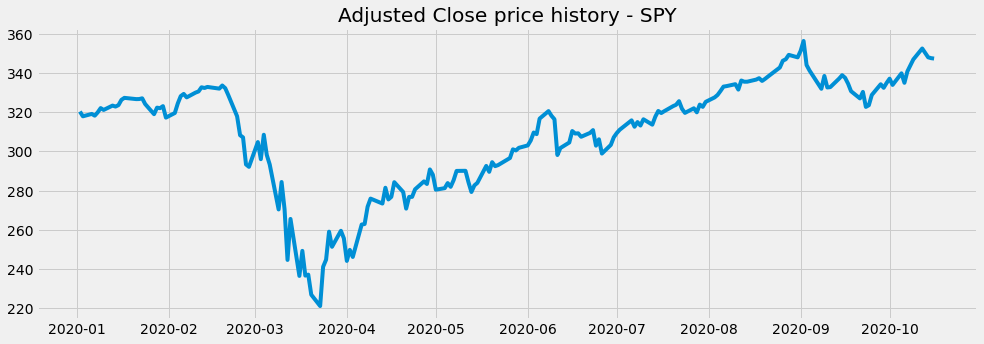

In [4]:
plt.figure(figsize=(15, 5))
plt.plot(spy.index, spy['Adj Close'])
plt.title('Adjusted Close price history - SPY')
plt.show()

In [5]:
# prepare the data to compute the RSI
# get the difference in price from the previous day
delta = spy['Adj Close'].diff(1)
# get rid of NaN
delta = delta.dropna()
# get the positive gains (up) and the negative gains (down)
up = delta.copy()
up[up<0] = 0
down = delta.copy()
down[down>0] = 0
# get the time period for the RSI
period = 14 # usually it is 14 days
# compute the average gain and loss
avg_gain = up.rolling(window=period).mean()
avg_loss = abs(down.rolling(window=period).mean())

# compute the Relative Strength (RS)
RS = avg_gain / avg_loss
# compute the RSI
RSI = 100 - (100 / (1 + RS))

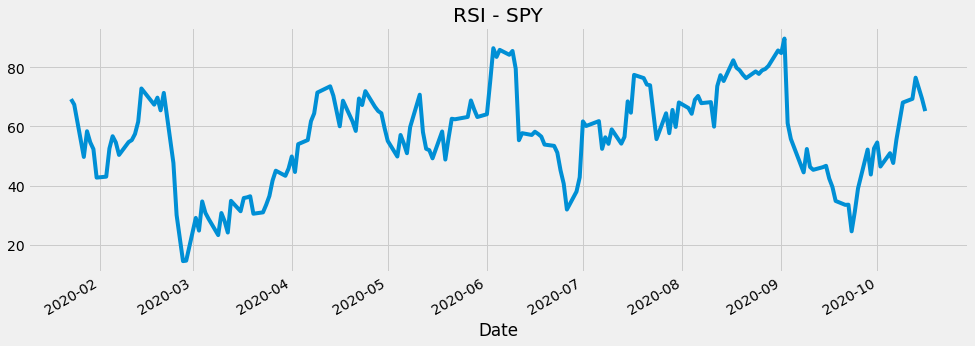

In [6]:
# visualize the RSI
plt.figure(figsize=(15,5))
RSI.plot()
plt.title('RSI - SPY')
plt.show()

In [7]:
# put it all together

new_df = pd.DataFrame()
new_df['Adj Close Price'] = spy['Adj Close']
new_df['RSI'] = RSI

new_df.tail()

,Adj Close Price,RSI
2020-10-12,352.429993,69.361326
2020-10-13,350.130005,76.539843
2020-10-14,347.929993,72.990742
2020-10-15,347.500000,69.418550
2020-10-16,347.290009,65.204261


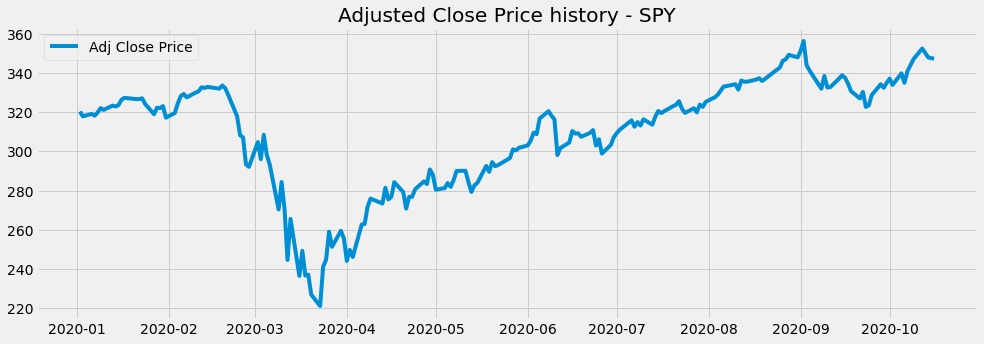

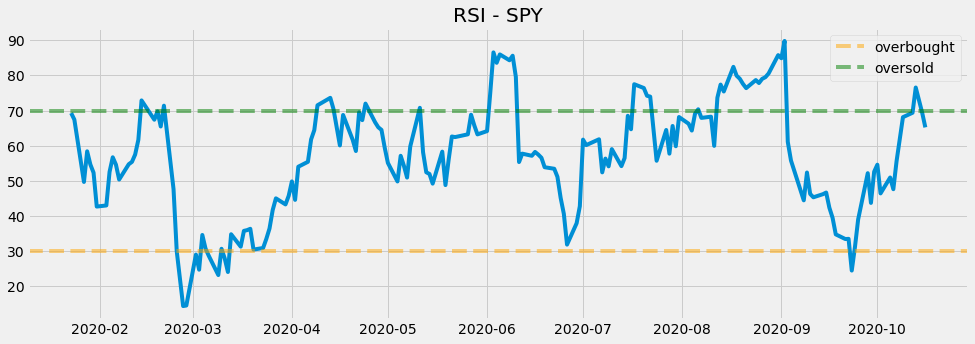

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(new_df.index, new_df['Adj Close Price'])
plt.title('Adjusted Close Price history - SPY')
plt.legend(new_df.columns.values, loc='upper left')
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(new_df.index, new_df['RSI'])
plt.title('RSI - SPY')
plt.axhline(30, linestyle='--', alpha=0.5, color='orange', label='overbought')
plt.axhline(70, linestyle='--', alpha=0.5, color='green', label='oversold')
plt.legend()
plt.show()